Setup

In [31]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [53]:
import pandas as pd

# Încarcă seturile de date
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# Adaugă coloana 'type'
red_wine['type'] = 'red'

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [55]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')

white_wine['type'] = 'white'

white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [56]:
# Combinați cele două seturi de date
# ignore_index = True pt a reseta indicii
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Verifică structura datelor combinate
print("Dimensiune set combinat:", wine_data.shape)
print("\nPrimele 5 înregistrări:")
display(wine_data.head())
print("\nUltimele 5 înregistrări:")
display(wine_data.tail())

Dimensiune set combinat: (6497, 13)

Primele 5 înregistrări:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red



Ultimele 5 înregistrări:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [35]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [36]:
# Verifică distribuția tipurilor
print("\nDistribuția tipurilor de vin:")
print(wine_data['type'].value_counts())

# Verifică dacă toate coloanele sunt prezente
print("\nColoanele finale:", wine_data.columns.tolist())


Distribuția tipurilor de vin:
type
white    4898
red      1599
Name: count, dtype: int64

Coloanele finale: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


In [37]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Saving figure attribute_histogram_plots


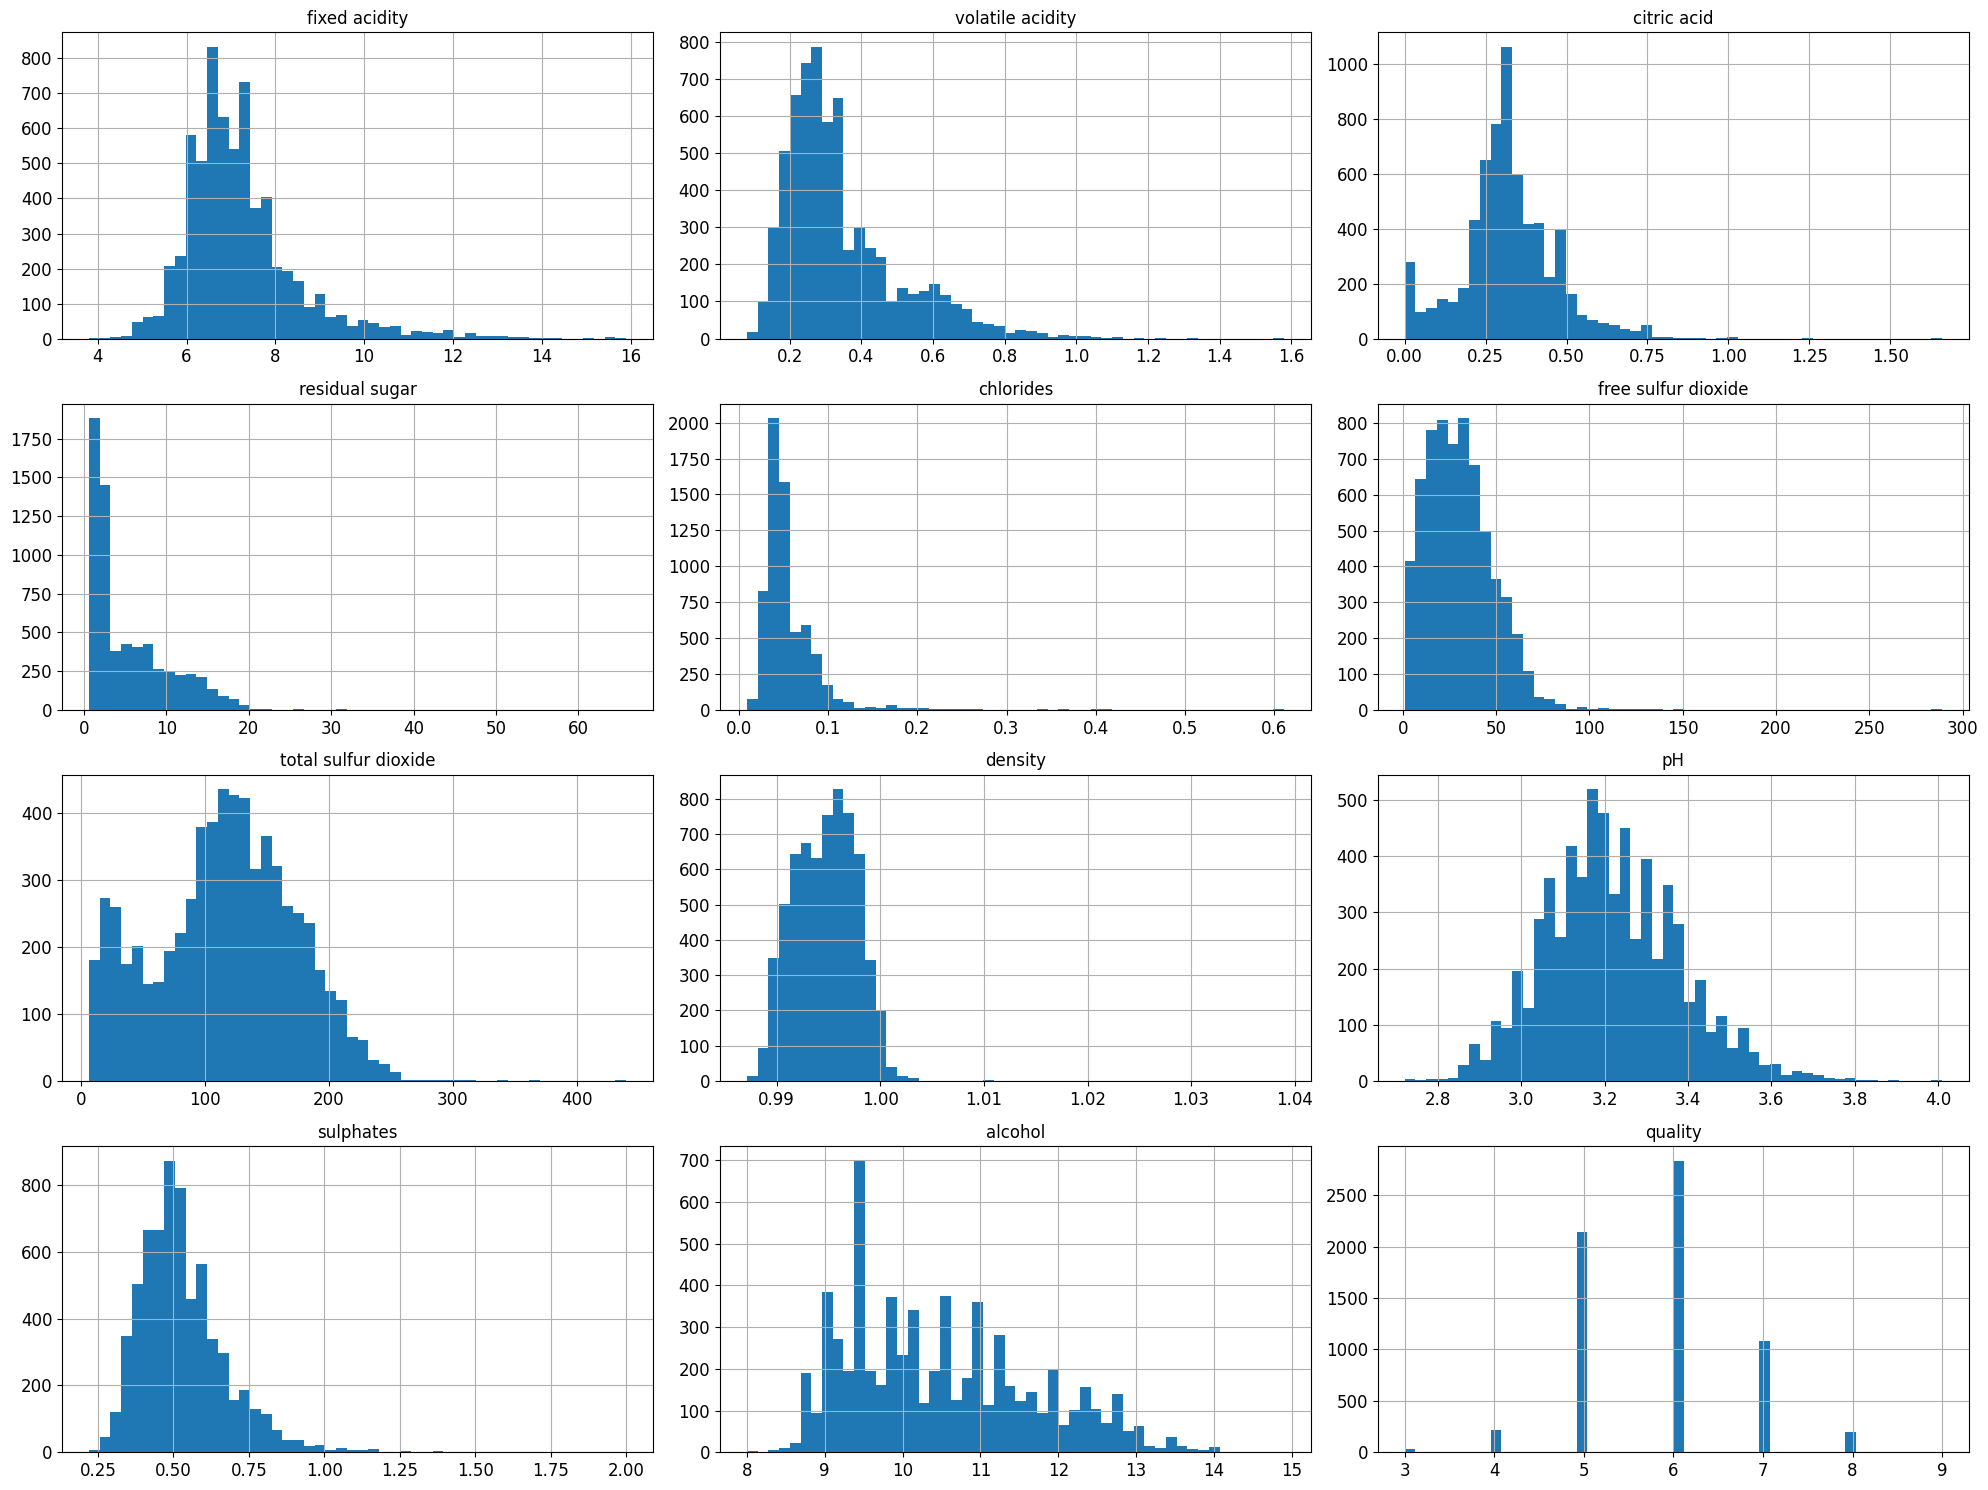

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
wine_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### 1. Analiza Preliminară a Setului Combinat

In [39]:
print("\nValori lipsă în setul combinat:")
print(wine_data.isnull().sum())

# Verificare duplicate
print("\nNumăr de duplicate:", wine_data.duplicated().sum())


Valori lipsă în setul combinat:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Număr de duplicate: 1177


### 2. Analiza Distribuției Calității

Saving figure quality_distribution_by_type


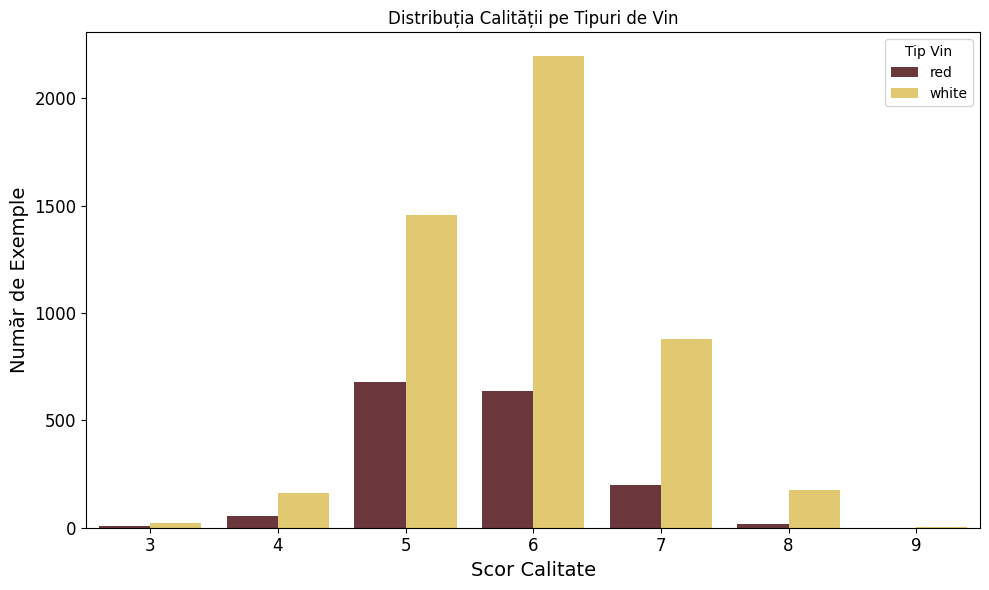

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=wine_data, palette={'red': '#722f37', 'white': '#f4d35e'})
plt.title('Distribuția Calității pe Tipuri de Vin')
plt.xlabel('Scor Calitate')
plt.ylabel('Număr de Exemple')
plt.legend(title='Tip Vin')
save_fig('quality_distribution_by_type')
plt.show()

### 3. Comparație Statistici Descriptive pe Tipuri

In [41]:
# Separare date pe tipuri
red_stats = wine_data[wine_data['type'] == 'red'].describe().transpose()
white_stats = wine_data[wine_data['type'] == 'white'].describe().transpose()

# Adăugare diferențe relative
comparison = pd.concat([
    red_stats.add_prefix('red_'),
    white_stats.add_prefix('white_'),
    ((white_stats - red_stats)/red_stats * 100).add_prefix('diff_%_')
], axis=1)

display(comparison.round(2).head(13))

,red_count,red_mean,red_std,red_min,red_25%,red_50%,red_75%,red_max,white_count,white_mean,...,white_75%,white_max,diff_%_count,diff_%_mean,diff_%_std,diff_%_min,diff_%_25%,diff_%_50%,diff_%_75%,diff_%_max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90,4898.0,6.85,...,7.30,14.20,206.32,-17.61,-51.53,-17.39,-11.27,-13.92,-20.65,-10.69
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58,4898.0,0.28,...,0.32,1.10,206.32,-47.28,-43.71,-33.33,-46.15,-50.00,-50.00,-30.38
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00,4898.0,0.33,...,0.39,1.66,206.32,23.33,-37.88,NaN,200.00,23.08,-7.14,66.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50,4898.0,6.39,...,9.90,65.80,206.32,151.75,259.74,-33.33,-10.53,136.36,280.77,324.52
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61,4898.0,0.05,...,0.05,0.35,206.32,-47.67,-53.58,-25.00,-48.57,-45.57,-44.44,-43.37
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00,4898.0,35.31,...,46.00,289.00,206.32,122.41,62.59,100.00,228.57,142.86,119.05,301.39
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00,4898.0,138.36,...,167.00,440.00,206.32,197.76,29.19,50.00,390.91,252.63,169.35,52.25
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00,4898.0,0.99,...,1.00,1.04,206.32,-0.27,58.47,-0.30,-0.39,-0.30,-0.17,3.52
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01,4898.0,3.19,...,3.28,3.82,206.32,-3.71,-2.19,-0.73,-3.74,-3.93,-3.53,-4.74
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00,4898.0,0.49,...,0.55,1.08,206.32,-25.57,-32.67,-33.33,-25.45,-24.19,-24.66,-46.00


### 4. Vizualizare Distribuții Feature-uri

Saving figure feature_distributions_by_type


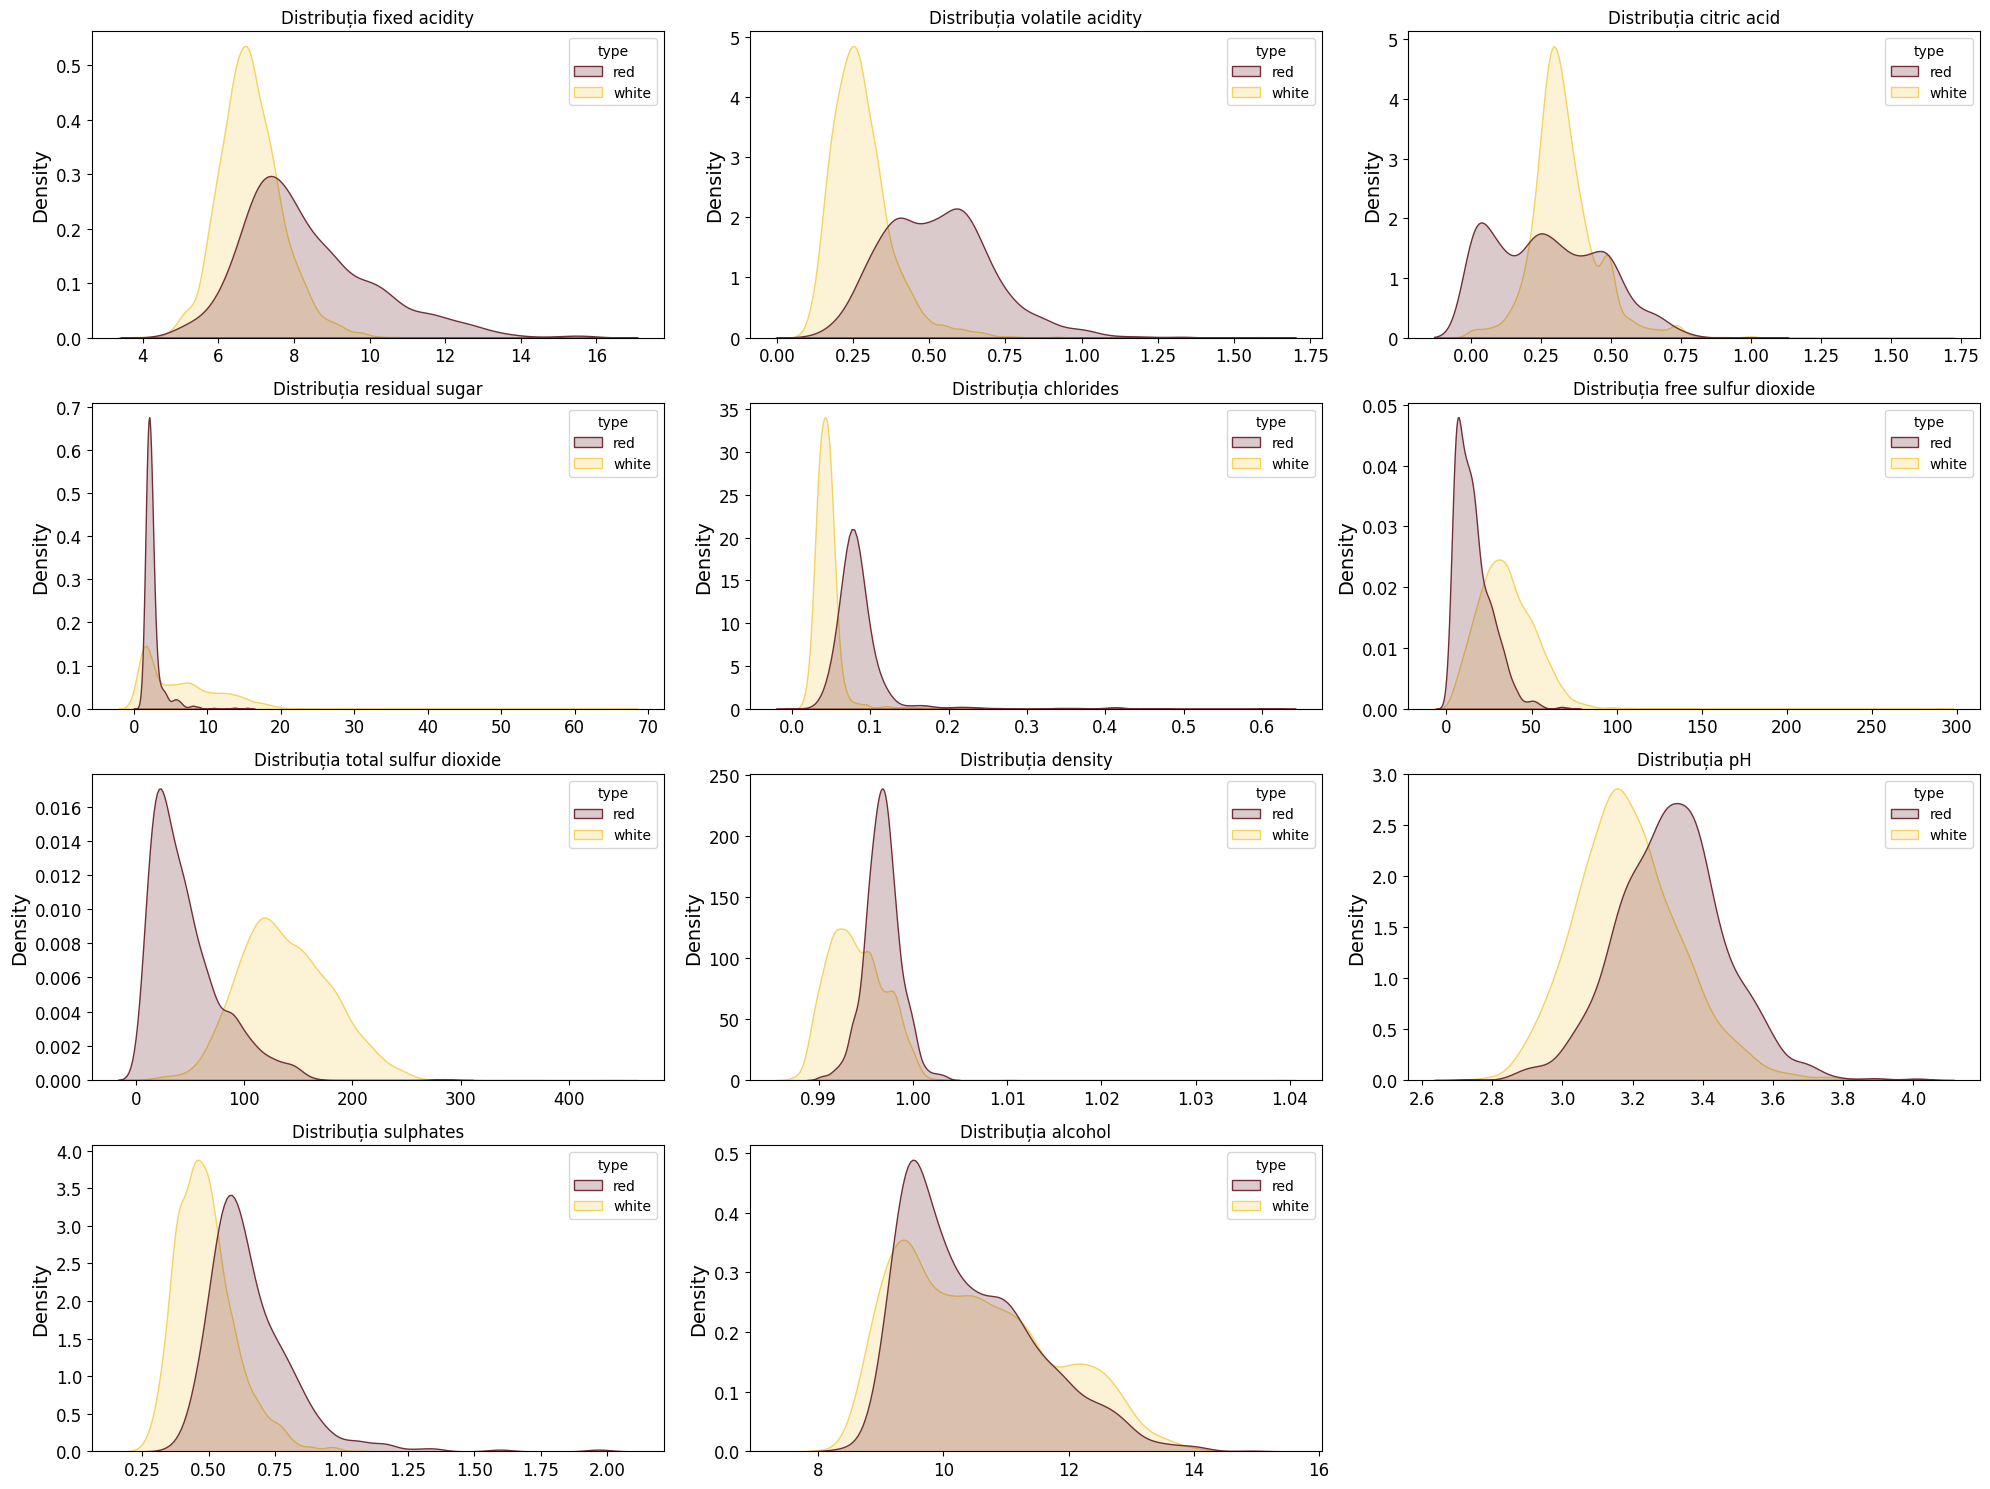

In [42]:
features = wine_data.columns[:-2]  # Excludem 'quality' și 'type'

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    # kdeplot pt a vizualiza distribuția de densitate pt fiecare atribut
    # common_norm=False permite ca densitățile să fie normalizate separat, astfel încât ambele distribuții sunt vizibile chiar dacă un tip de vin are mult mai multe exemple
    sns.kdeplot(data=wine_data, x=feature, hue='type',
               palette={'red': '#722f37', 'white': '#f4d35e'},
               fill=True, common_norm=False)
    plt.title(f'Distribuția {feature}')
    plt.xlabel('')

plt.tight_layout()
save_fig('feature_distributions_by_type')
plt.show()

### 5. Analiza Corelațiilor


Saving figure global_correlation_heatmap


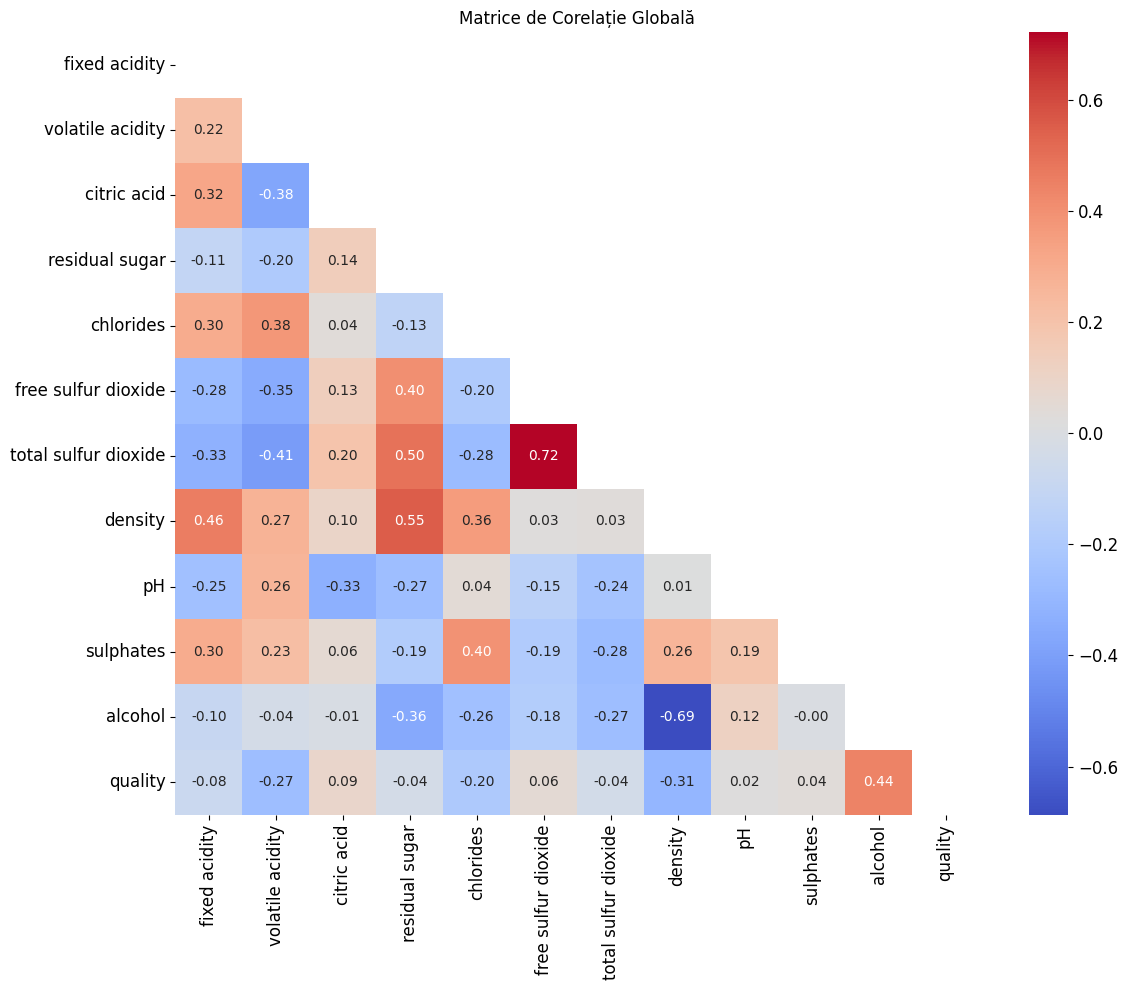

Saving figure correlation_by_wine_type


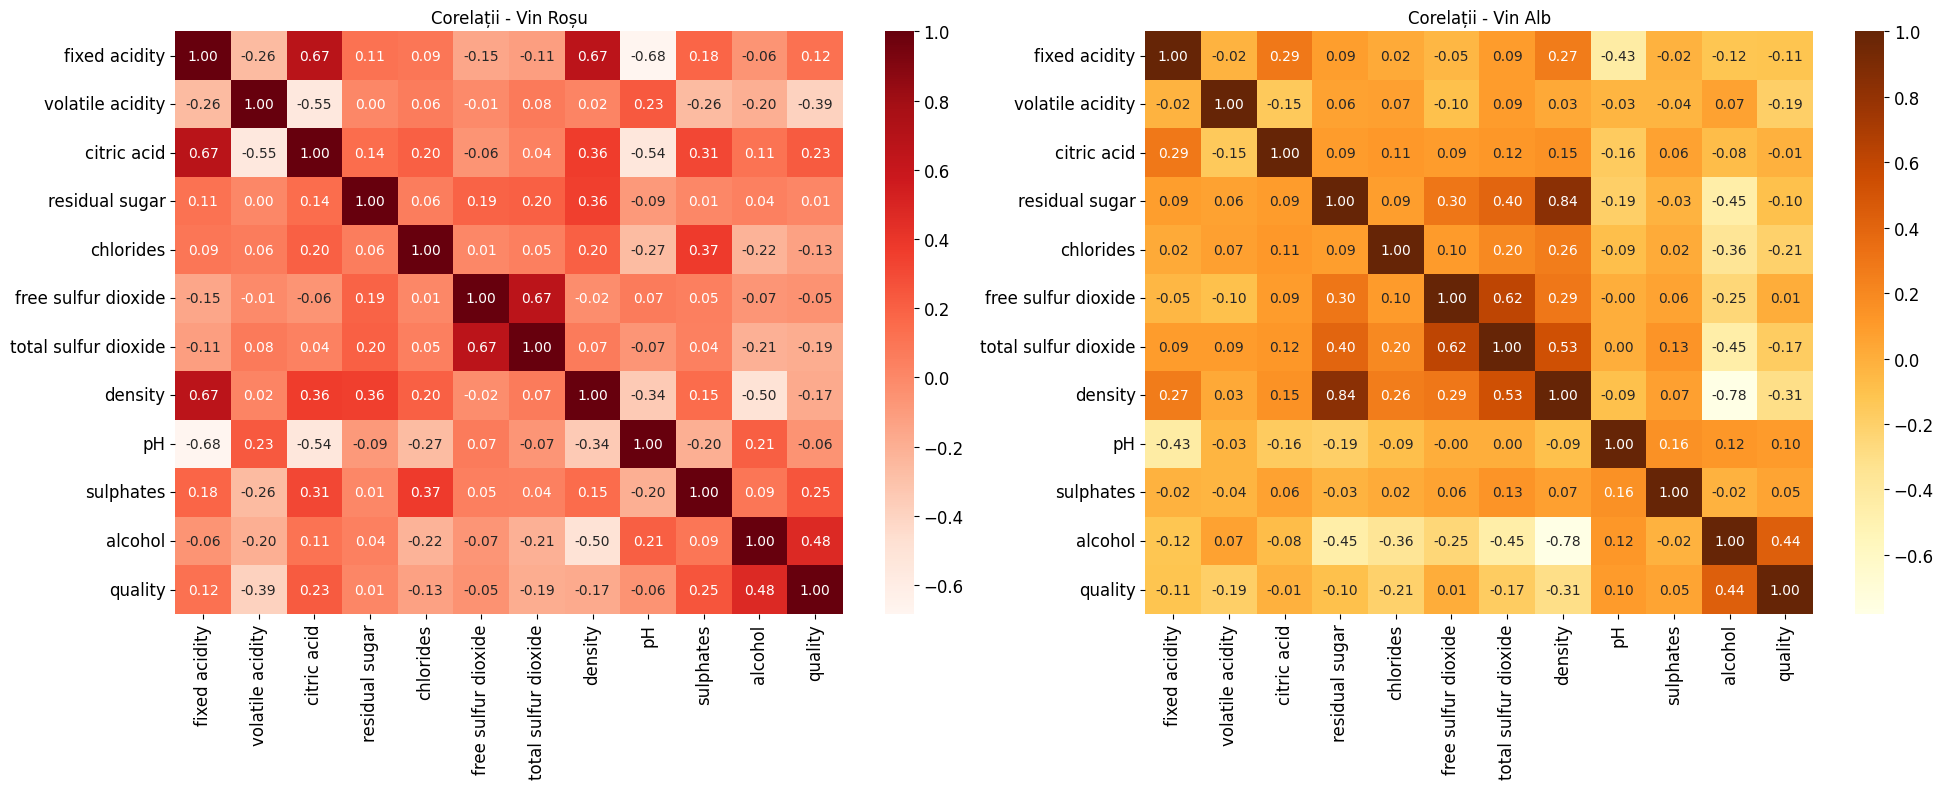

In [43]:
# Corelații globale
# corelațiile generale pentru toate vinurile, folosind coolwarm pentru a evidenția corelațiile pozitive (roșu) și negative (albastru)
# 1	    Corelație pozitivă perfectă (cresc împreună proporțional)
# 0	    Fără corelație liniară
# -1	Corelație negativă perfectă (o variabilă crește când cealaltă scade)

plt.figure(figsize=(12, 10))
corr_matrix = wine_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(corr_matrix))
plt.title('Matrice de Corelație Globală')
save_fig('global_correlation_heatmap')
plt.show()

# Corelații diferențiate pe tipuri
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Vin roșu
sns.heatmap(wine_data[wine_data['type'] == 'red'].corr(numeric_only=True),
            ax=axes[0], annot=True, fmt=".2f", cmap='Reds')
axes[0].set_title('Corelații - Vin Roșu')

# Vin alb
sns.heatmap(wine_data[wine_data['type'] == 'white'].corr(numeric_only=True),
            ax=axes[1], annot=True, fmt=".2f", cmap='YlOrBr')
axes[1].set_title('Corelații - Vin Alb')

plt.tight_layout()
save_fig('correlation_by_wine_type')
plt.show()

### 6. Analiza Interacțiunilor între Feature-uri


Saving figure feature_interactions_pairplot


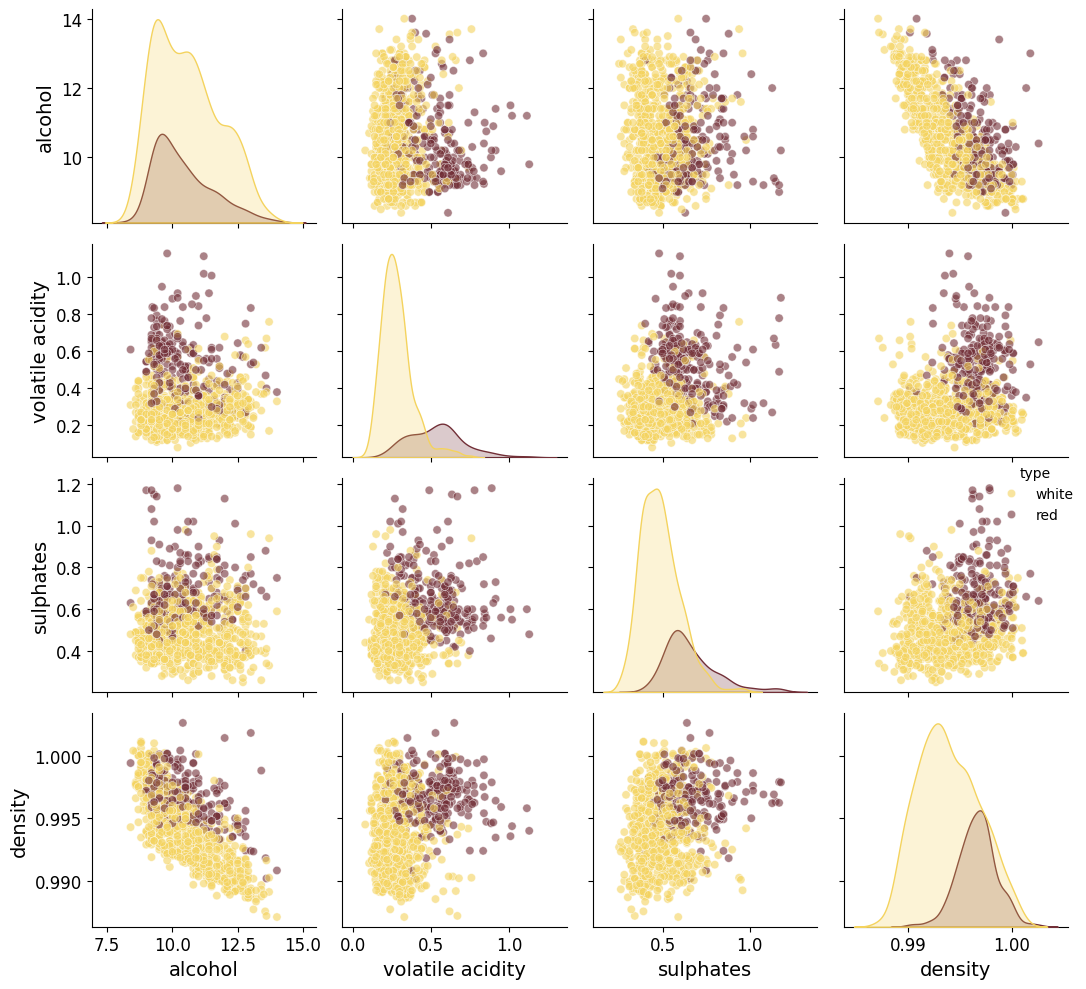

In [44]:
sns.pairplot(wine_data.sample(1000), vars=['alcohol', 'volatile acidity', 'sulphates', 'density'],
             hue='type', palette={'red': '#722f37', 'white': '#f4d35e'},
             plot_kws={'alpha': 0.6})
save_fig('feature_interactions_pairplot')
plt.show()

# Detectezi clustere naturale
# Observi diferențele de distribuție între vinurile roșii și albe

### 7. Analiza Calității vs. Componente Cheie

Saving figure quality_vs_key_features


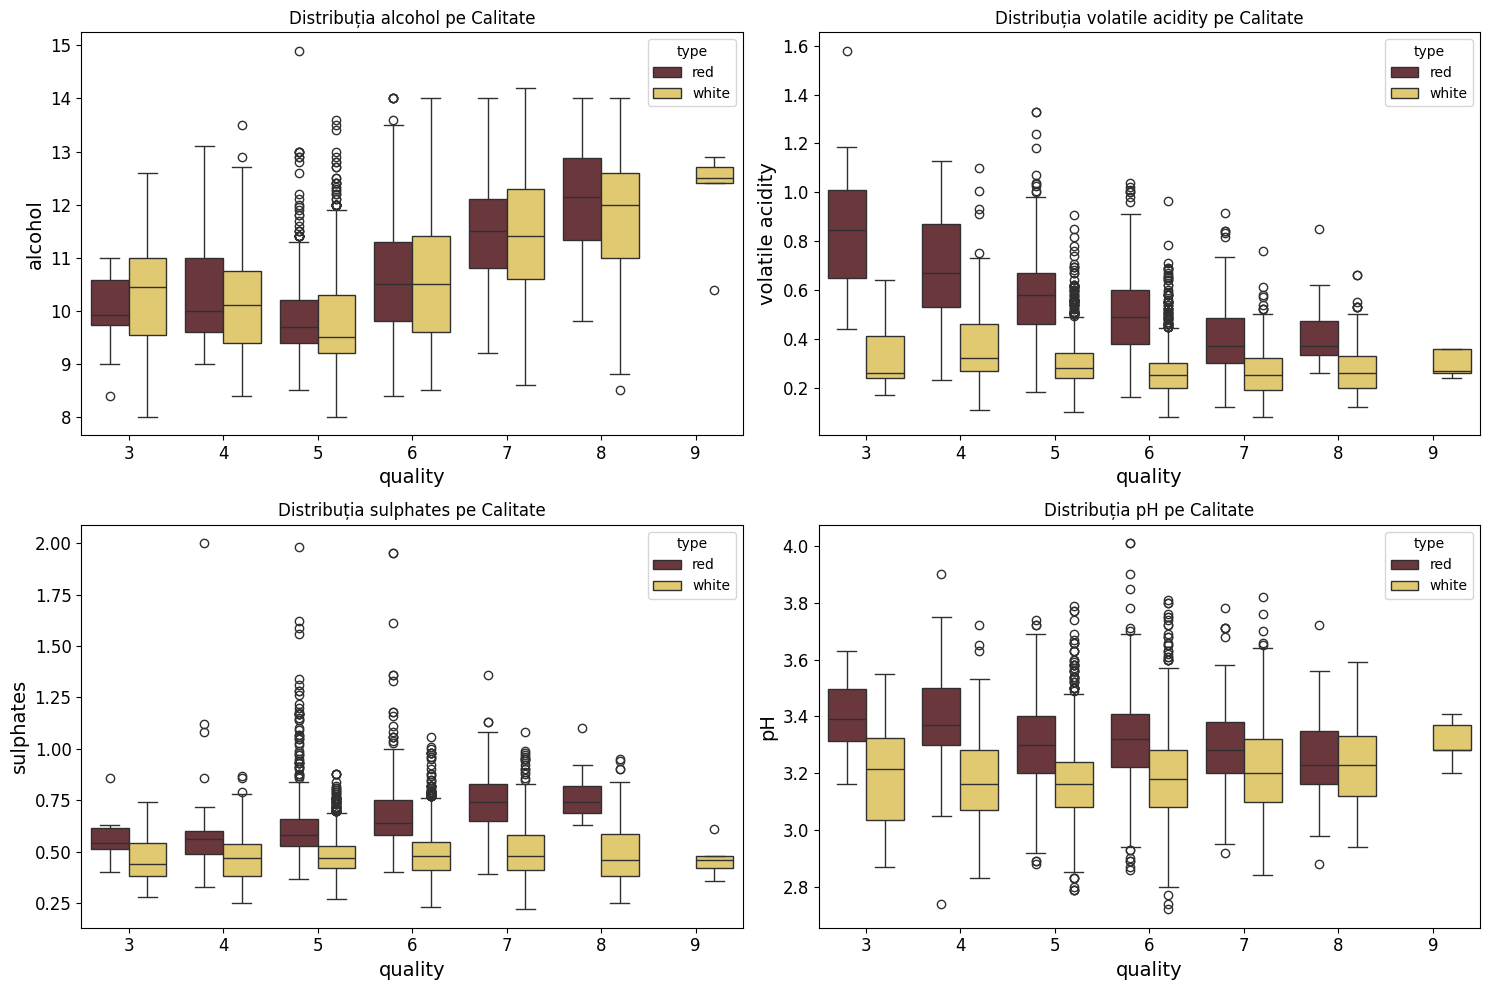

In [45]:
key_features = ['alcohol', 'volatile acidity', 'sulphates', 'pH']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='quality', y=feature, hue='type', data=wine_data,
                palette={'red': '#722f37', 'white': '#f4d35e'})
    plt.title(f'Distribuția {feature} pe Calitate')

plt.tight_layout()
save_fig('quality_vs_key_features')
plt.show()

# Cum variază fiecare proprietate chimică în funcție de calitatea vinului
# - alcoolul crește cu calitatea
# - aciditatea volatilă scade cu calitatea
# - sulfatul crește usor cu calitatea, Vinurile roșii au un conținut de sulfați mai mare și mai variabil
# - ph relativ constat

### Split the data

In [62]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(wine_data, test_size=0.2, random_state=42)
print("train_set length =", len(train_set))
print("test_set length =", len(test_set))

train_set length = 5197
test_set length = 1300


In [58]:
test_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3103,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red
4761,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white
4690,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white
4032,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white


In [60]:
train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1916,6.6,0.240,0.35,7.7,0.031,36.0,135.0,0.99380,3.19,0.37,10.5,5,white
947,8.3,0.280,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,red
877,7.7,0.715,0.01,2.1,0.064,31.0,43.0,0.99371,3.41,0.57,11.8,6,red
2927,5.2,0.370,0.33,1.2,0.028,13.0,81.0,0.99020,3.37,0.38,11.7,6,white
6063,6.6,0.260,0.56,15.4,0.053,32.0,141.0,0.99810,3.11,0.49,9.3,5,white


### 8. Pregătirea Datelor pentru Modelare

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

# Definim un transformer custom pentru feature engineering
class WineFeatureEngineer(BaseEstimator, TransformerMixin):
    def __init__(self, add_acid_balance=True, add_sugar_ratio=True):
        self.add_acid_balance = add_acid_balance
        self.add_sugar_ratio = add_sugar_ratio

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        if self.add_acid_balance:
            X['acid_balance'] = X['fixed acidity'] / (X['volatile acidity'] + 1e-8)
        if self.add_sugar_ratio:
            X['sugar_alcohol_ratio'] = X['residual sugar'] / (X['alcohol'] + 1e-8)
        return X

# Separare features și target
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split stratificat
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Definim coloanele ( numerice si categorice separat)
numeric_features = X_train.columns[X_train.dtypes != 'object'].tolist()
categorical_features = ['type']

# Pipeline numeric
numeric_transformer = Pipeline(steps=[
    ('engineer', WineFeatureEngineer()),
    ('imputer', SimpleImputer(strategy='median')),  # Pentru robustețe, chiar dacă nu avem NaN
    ('scaler', StandardScaler())
])

# Pipeline categoric
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinație finală
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])